In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

# read data
df = pd.read_csv(r'D:\agnext\Agnext\ML\dataset\train.csv')
print(df.shape)
print(df.head())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [78]:
print(f"# of passengers in total: {len(df)}")

# of passengers in total: 891


In [79]:
## Analyze the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

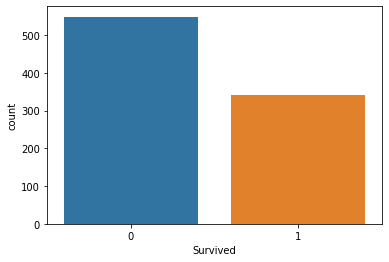

In [80]:
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

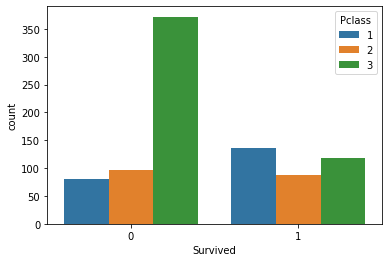

In [81]:
sns.countplot(x='Survived', hue='Pclass', data=df)

See Rich folks are always safe

<AxesSubplot:xlabel='Survived', ylabel='count'>

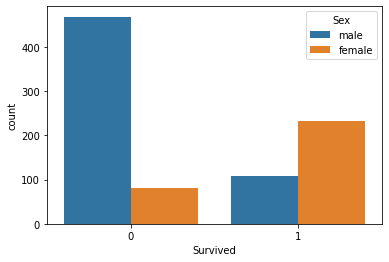

In [82]:
sns.countplot(x= "Survived", hue="Sex", data = df)

<AxesSubplot:ylabel='Frequency'>

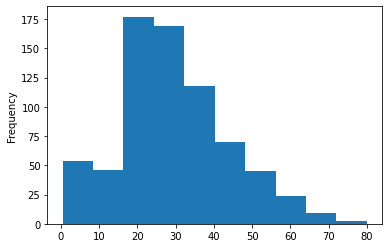

In [83]:
df["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

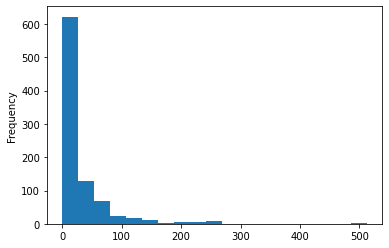

In [84]:
df["Fare"].plot.hist(bins = 19)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

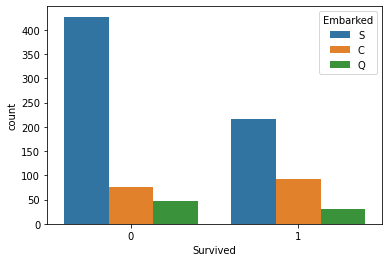

In [86]:
sns.countplot(x = "Survived", hue = "Embarked", data = df)

In [87]:
# data wrangling 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

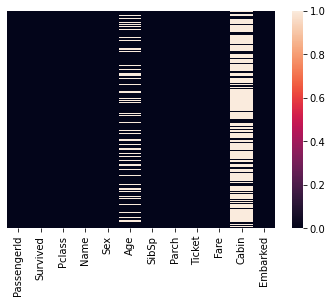

In [88]:
sns.heatmap(df.isnull(), yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

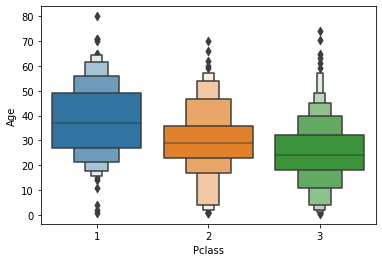

In [89]:
sns.boxenplot(x = "Pclass", y = "Age", data = df)

In [90]:
# data cleaning
df.drop("Cabin", axis = 1, inplace = True)
df.dropna(inplace = True)


<AxesSubplot:>

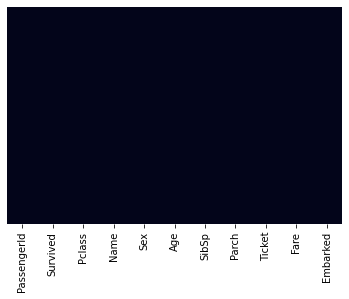

In [91]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)

So data is Clean now

In [92]:
# converting it in binary
gender = pd.get_dummies(df["Sex"], drop_first= True)

In [93]:
embarked  = pd.get_dummies(df["Embarked"], drop_first = True)
print(embarked)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
885  1  0
886  0  1
887  0  1
889  0  0
890  1  0

[712 rows x 2 columns]


In [94]:
df = pd.concat([df, gender, embarked], axis=1)

In [95]:
# droped all non numiric values
df.drop(["Sex", "Embarked", "PassengerId","Name","Ticket","Pclass"], axis=1, inplace=True)

In [99]:
print(df.head(10))

    Survived   Age  SibSp  Parch     Fare  male  Q  S
0          0  22.0      1      0   7.2500     1  0  1
1          1  38.0      1      0  71.2833     0  0  0
2          1  26.0      0      0   7.9250     0  0  1
3          1  35.0      1      0  53.1000     0  0  1
4          0  35.0      0      0   8.0500     1  0  1
6          0  54.0      0      0  51.8625     1  0  1
7          0   2.0      3      1  21.0750     1  0  1
8          1  27.0      0      2  11.1333     0  0  1
9          1  14.0      1      0  30.0708     0  0  0
10         1   4.0      1      1  16.7000     0  0  1


In [100]:
### traning and Testing

y = df["Survived"]
df.drop(["Survived"], axis= 1, inplace= True)
X = df

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logmodel = LogisticRegression()

In [106]:
logmodel.fit(X_train, y_train)

d:\agnext\Agnext\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
predictions = logmodel.predict(X_test)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.83      0.80       122\n           1       0.74      0.66      0.70        92\n\n    accuracy                           0.76       214\n   macro avg       0.75      0.75      0.75       214\nweighted avg       0.76      0.76      0.75       214\n'

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [111]:
confusion_matrix(y_test, predictions)

array([[101,  21],
       [ 31,  61]], dtype=int64)

SUV Predection 

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math



# read data
df = pd.read_csv(r'D:\agnext\Agnext\ML\dataset\suv_data.csv')
print(df.shape)
print(df.head())

(400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [113]:
X= df.iloc[:,0:2]
y = df.iloc[:,4]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


ValueError: could not convert string to float: 'Male'